In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import calendar
from datetime import datetime
from datetime import date



In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.shape

(12980, 12)

In [5]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0      81.0        0.0       3          13     16  
1      80.0        0.0       8          32     40  
2      80.0        0.0       5          27     32  
3      75.0        0.0       3          10     13  
4      75.0        0.0       0           1      1

In [6]:
test.shape

(4399, 11)

In [7]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2012-06-30 1:00:00       3        0           0        3  26.24  28.790   
1  2012-06-30 2:00:00       3        0           0        2  26.24  28.790   
2  2012-06-30 3:00:00       3        0           0        2  26.24  28.790   
3  2012-06-30 4:00:00       3        0           0        2  25.42  27.275   
4  2012-06-30 5:00:00       3        0           0        1  26.24  28.790   

   humidity  windspeed  casual  registered  
0      89.0    15.0013       3          55  
1      89.0     0.0000       7          54  
2      89.0     0.0000       3          20  
3      94.0     0.0000       3          15  
4      89.0    11.0014       3           7

In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

<AxesSubplot:xlabel='holiday', ylabel='season'>

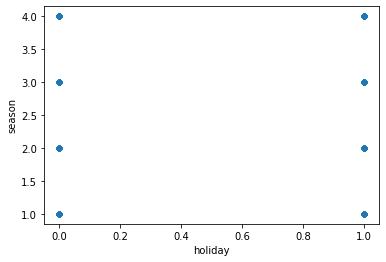

In [12]:
train.plot.scatter('holiday','season')

<AxesSubplot:xlabel='temp', ylabel='season'>

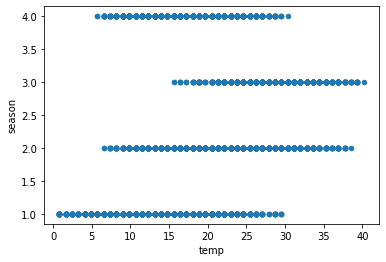

In [13]:
train.plot.scatter('temp','season')

<AxesSubplot:xlabel='humidity', ylabel='season'>

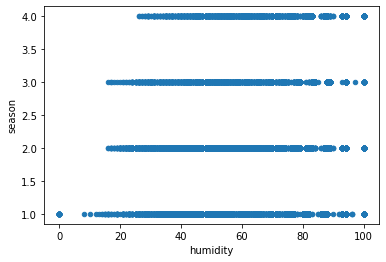

In [14]:
train.plot.scatter('humidity','season')

<AxesSubplot:xlabel='windspeed', ylabel='season'>

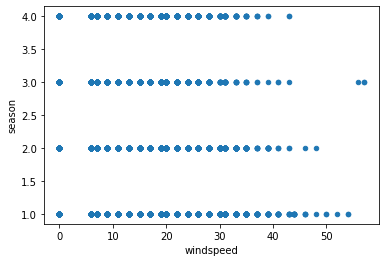

In [15]:
train.plot.scatter('windspeed','season')

<AxesSubplot:xlabel='registered', ylabel='season'>

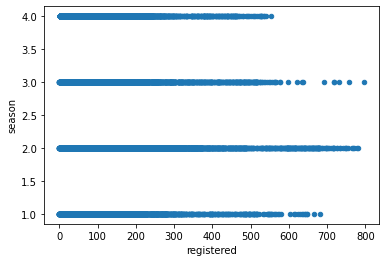

In [16]:
train.plot.scatter('registered','season')

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


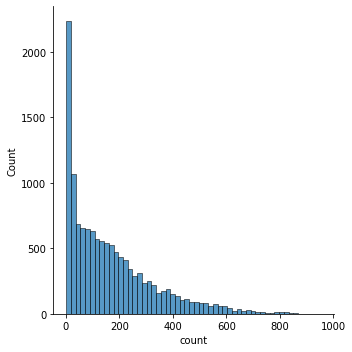

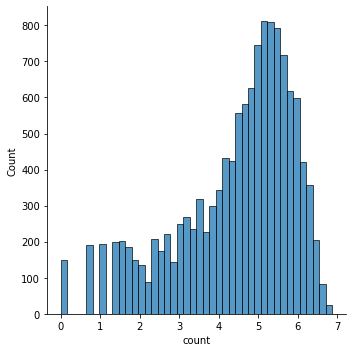

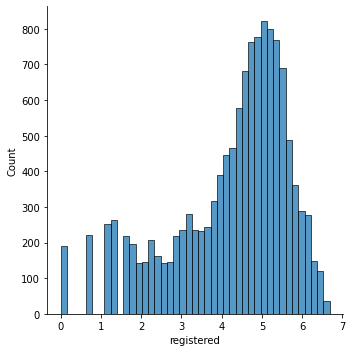

In [17]:
sns.displot(train['count'])

sns.displot(np.log(train['count']))
sns.displot(np.log(train['registered']))

C:\Users\2153h\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


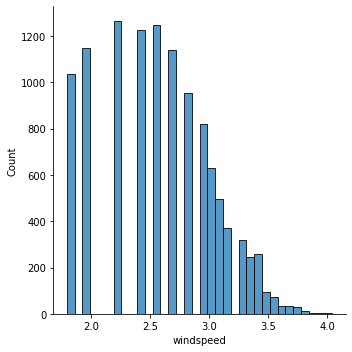

In [18]:
sns.displot(np.log(train['windspeed']))


<AxesSubplot:>

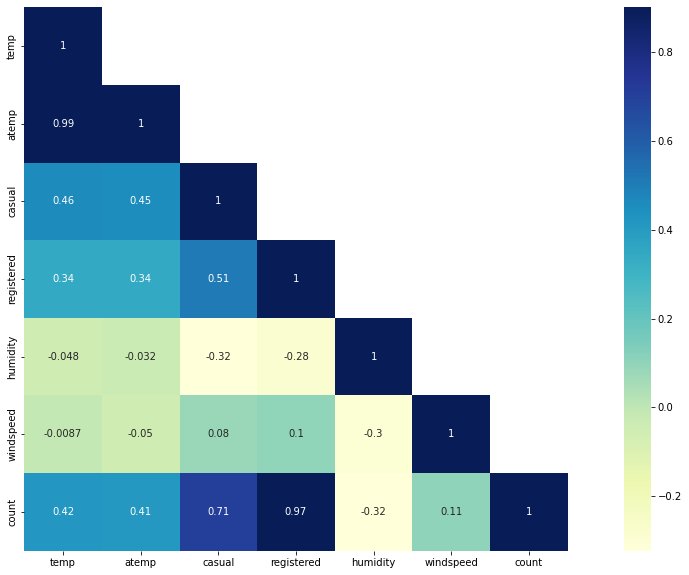

In [19]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True, annot=True, cmap="YlGnBu")


In [20]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [21]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [22]:
train["date"]=train.datetime.apply(lambda x: x.split()[0])
train["time"]=train.datetime.apply(lambda x: x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [23]:
test["date"]=test.datetime.apply(lambda x: x.split()[0])
test["time"]=test.datetime.apply(lambda x: x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [24]:
training=train[train['datetime']<='2012-03-30 00:00:00']
validation=train[train['datetime']>'2012-03-30 00:00:00']

In [25]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

### model building

In [26]:
##linear regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model1= LinearRegression()

In [31]:
x_train=training.drop('count',1)
y_train= np.log(training['count'])
x_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

C:\Users\2153h\AppData\Local\Temp\ipykernel_3936\2178567759.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=training.drop('count',1)
C:\Users\2153h\AppData\Local\Temp\ipykernel_3936\2178567759.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val = validation.drop('count', 1)


In [36]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10773, 11), (10773,), (2207, 11), (2207,))

In [37]:
model1.fit(x_train,y_train)

LinearRegression()

In [38]:
prediction = model1.predict(x_val)

In [39]:
def rmsle(y, y_):
    y = np.exp(y),  
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [40]:
rmsle(y_val,prediction)

0.8876469542289628

In [42]:
test_prediction = model1.predict(test)

In [43]:
test_prediction

array([3.25020161, 3.26666189, 3.05708414, ..., 4.30200224, 4.1438553 ,
       4.08274552])

###decision tree


In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [47]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [48]:
predict = dt_reg.predict(x_val)

In [49]:
rmsle(y_val, predict)

0.17134338947669234

In [50]:
test_prediction = dt_reg.predict(test)

In [51]:
final_prediction = np.exp(test_prediction)

In [52]:
submission = pd.DataFrame()

In [53]:
submission['count'] = final_prediction


In [54]:
submission.to_csv('submission.csv', header=True, index=False)